In [1]:
import numpy as np
import pandas as pd
import csv
import mysql.connector
from datetime import date, datetime
import random
import time
import matplotlib.pyplot as plt

In [2]:
class Lotofacil:
    def __init__(self):
        self.id = 0
        self.data_sorteio = None
        self.ganhadores_15_numeros = 0
        self.valor_rateio_15_numeros = 0
        self.valor_rateio_14_numeros = 0
        self.valor_rateio_13_numeros = 0
        self.valor_rateio_12_numeros = 0
        self.valor_rateio_11_numeros = 0
        self.numeros = ()
        self.par = 0
        self.impar = 0
        self.sequencia = ()
        self.vertical = ()
        self.horizontal = ()
        
    def set_numeros(self, numeros):
        self.numeros = tuple(numeros)
        self.setParImpar()
        self.set_sequencia()
        
    def set_sequencia(self):
        sequencia = []
        count = []

        sequencia.append(self.numeros[0])
        
        for i in np.arange(1, len(self.numeros)):
            if (self.numeros[i] == self.numeros[i-1] + 1):
                sequencia.append(self.numeros[i])
            else:
                if (len(sequencia) >= 2):
                    count.append(len(sequencia))
                    
                    sequencia = []
                    sequencia.append(self.numeros[i])
                    
        self.sequencia = tuple(count)
        
    def setParImpar(self):
        self.par = sum([1 if x % 2 == 0 else 0 for x in self.numeros])
        self.impar = len(self.numeros) - self.par

In [3]:
class Jogo:
    def __init__(self):
        self.id = None
        self.data_cadastro = None
        self.quantidade = 0
        self.numeros = ()
        self.par = 0
        self.impar = 0
        self.sequencia = ()
        self.vertical = ()
        self.horizontal = ()
        
#     def sorteio(self, qtdNumeros = 15):
#         self.numeros = sorted(tuple(np.random.choice(np.arange(1, 26), qtdNumeros, replace= False)))
#         self.setQuantidade()
#         self.setParImpar()
        
#     def setQuantidade(self):
#         self.quantidade = len(self.numeros)

    def set_numeros(self, numeros):
        self.numeros = tuple(numeros)
        self.setParImpar()
        self.set_sequencia()
        
    def setParImpar(self):
        self.par = sum([1 if x % 2 == 0 else 0 for x in self.numeros])
        self.impar = len(self.numeros) - self.par
        
    def set_sequencia(self):
        sequencia = []
        count = []

        for i in np.arange(0, len(self.numeros)):
            if (i == 0):
                sequencia.append(self.numeros[i])
            else:
                if (self.numeros[i] == self.numeros[i-1] + 1):
                    sequencia.append(self.numeros[i])
                else:
                    if (len(sequencia) >= 2):
                        count.append(len(sequencia))

                    sequencia = []
                    sequencia.append(self.numeros[i])

        self.sequencia = tuple(count)

In [4]:
def get_concursos_lotofacil_csv(arquivo):
    concursos = []
    
    with open(arquivo) as file:
        lotofacil = csv.reader(file, delimiter=';')
        data = list(lotofacil)
    
    for x in data[1:]:
        concurso = Lotofacil()
        concurso.id = int(x[0])
        concurso.data_sorteio = x[1]
        concurso.set_numeros(sorted(tuple(map(int, x[2:17]))))
#         concurso.numeros = sorted(tuple(map(int, x[2:17])))
        concurso.ganhadores_15_numeros = int(x[17])
        concurso.valor_rateio_15_numeros = float(x[18].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_14_numeros = float(x[19].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_13_numeros = float(x[20].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_12_numeros = float(x[21].replace('.', '').replace(',', '.'))
        concurso.valor_rateio_11_numeros = float(x[22].replace('.', '').replace(',', '.'))
#         concurso.setParImpar()
        concursos.append(concurso)
    
    return tuple(concursos)

In [5]:
def gerar_jogos(numero_jogos = 1000, numeros_por_jogo = 15, menor_numero = (), maior_numero = ()):
    count = 0
    jogos = []
    tentativas = 0
    
    try:
    
        while (len(jogos) < numero_jogos and tentativas < 100):
            add = False
            jogo = Jogo()
            jogo.sorteio(numeros_por_jogo)

            if (jogo.numeros[0] not in menor_numero or jogo.numeros[-1] not in maior_numero):
                tentativas += 1
                continue

            for i in jogos:
                if (len(i.numeros) == len(jogo.numeros)):
                    if (len(set(i.numeros).intersection(jogo.numeros)) == len(jogo.numeros)):
                        tentativas += 1
                        break

            jogos.append(jogo)
            count += 1
            tentativas = 0
            
        return tuple(jogos)
            
    except Exception as ex:
        return ex

In [93]:
def filtrar_concursos_range(concursos, inicial, final):
    concursos_filtrados = []
    
    for c in concursos:
        if (c.id >= inicial and c.id <= final):
            concursos_filtrados.append(c)
    
    return concursos_filtrados

In [52]:
# def filtrar_ultimos_concursos(concursos, ultimos):
#     concursos_filtrados = []
    
#     if (ultimos is not None):
#         concursos_filtrados = concursos[len(concursos)-ultimos:]
        
#     return concursos_filtrados

In [8]:
def filtrar_concurso_por_numeros(concursos, numeros):
    concursos_filtrados = []
    
    for c in concursos:
        if (len(set(c.numeros).intersection(numeros)) == len(numeros)):
            concursos_filtrados.append(c)
#         if len(set(apostas[i].numeros).intersection(notin[j])) == len(notin[j]):
    
    return concursos_filtrados

In [9]:
def imprimir_concursos(concursos):
    print("Total concursos: %s \n" % (len(concursos)))
    for c in concursos:
        print("Concurso: ", c.id)
        print("Data Sorteio: ", c.data_sorteio)
        print("Ganhadores 15 pontos: %s " % (c.ganhadores_15_numeros))
        print("Impares: %s"% (c.impar))
        print("Pares: %s" % (c.par))
        print("Sequencia: ", c.sequencia)
        print(c.numeros)
        print("\n")

In [10]:
def imprimir_aposta(apostas):
    print("Total apostas: %s \n" % (len(apostas)))
    for a in apostas:
#         print("ID: ", a.id)
#         print("Data: ", a.data_sorteio)
        print("Impares: %s - Pares: %s" % (a.impar, a.par))
        print(a.numeros)
        print("\n")

In [11]:
def imprimir_jogo(jogos):
    print("Total jogos: %s \n" % (len(jogos)))
    for a in jogos:
        print("ID: ", a.id)
        print("Data Cadastro: ", a.data_cadastro)
        print("Numeros: %s - Impares: %s - Pares: %s | Sequencia: %s" % (len(a.numeros), a.impar, a.par, a.sequencia))
        print(a.numeros)
        print("\n")

In [12]:
def filtrar_jogo_menor_maior(jogos, menor = (), maior = ()):
    apostas_filtradas = []
    
    if (type(menor) != tuple):
        menor = tuple(menor)

    for jogo in jogos:
        if (jogo.numeros[0] in menor and jogo.numeros[-1] in maior):
            apostas_filtradas.append(jogo)
        
    return tuple(apostas_filtradas)

In [13]:
def filtrar_jogo_impar_par(jogos, impar = ()):
    apostas_filtradas = []
    
    for jogo in jogos:
        for i in impar:
            if (jogo.impar == i):
                apostas_filtradas.append(jogo)
        
    return tuple(apostas_filtradas)

In [14]:
def filtrar_jogo_por_numeros(jogos, numeros, match):
    apostas_filtradas = []
    
    for j in jogos:
        if (len(set(j.numeros).intersection(numeros)) >= match):
            apostas_filtradas.append(j)
        
    return apostas_filtradas

In [15]:
# def filtrar_jogo_sequencia(jogos, sequencia = ()):
#     apostas_filtradas = []
#     add = True
    
#     for jogo in jogos:
#         for s in sequencia:
#             if (len(set(jogo.numeros).intersection(s)) == len(s)):
#                 add = False
#                 break
                
#         if (add):
#             apostas_filtradas.append(jogo)
        
#     return tuple(apostas_filtradas)

In [16]:
def filtrar_jogo_sequencia(jogos, sequencia = ()):
    apostas_filtradas = []
    
    for jogo in jogos:
        if (len(set(jogo.numeros).intersection(sequencia)) == len(s)):
            apostas_filtradas.append(jogo)
        
    return tuple(apostas_filtradas)

In [94]:
def filtrar_jogo_notin(jogos, numeros):
    apostas_filtradas = []
    
    for j in jogos:
        if (len(set(j.numeros).intersection(numeros)) == 0):
            apostas_filtradas.append(j)
        
    return apostas_filtradas

In [18]:
def selecionar_jogos_aposta(jogos, quantidade):
    jogos_sample = random.sample(jogos, quantidade)
    menor_1 = 0
    menor_2 = 0
    menor_3 = 0
    impar_7 = 0
    impar_8 = 0
    impar_9 = 0
    seq_0 = 0
    seq_5 = 0
    seq_6 = 0
    seq_7 = 0

    for a in jogos_sample:
#         print(a.numeros, a.impar, a.par, a.numeros[0], a.numeros[-1])
        if a.numeros[0] == 1:
            menor_1 += 1
        elif a.numeros[0] == 2:
            menor_2 += 1
        elif a.numeros[0] == 3:
            menor_3 += 1

        if a.impar == 7:
            impar_7 += 1
        elif a.impar == 8:
            impar_8 += 1
        elif a.impar == 9:
            impar_9 += 1
            
        if a.sequencia == 0:
            seq_0 += 1
        elif a.sequencia == 5:
            seq_5 += 1
        elif a.sequencia == 6:
            seq_6 += 1
        elif a.sequencia == 7:
            seq_7 += 1

    print('Percentual jogos com 1: ', (menor_1/len(jogos_sample))*100)
    print('Percentual jogos com 2: ', (menor_2/len(jogos_sample))*100)
    print('Percentual jogos com 3: ', (menor_3/len(jogos_sample))*100)
    print('Percentual jogos impar 7: ', (impar_7/len(jogos_sample))*100)
    print('Percentual jogos impar 8: ', (impar_8/len(jogos_sample))*100)
    print('Percentual jogos impar 9: ', (impar_9/len(jogos_sample))*100)
    print('Sequencia 0: ', (seq_0/len(jogos_sample))*100)
    print('Sequencia 5: ', (seq_5/len(jogos_sample))*100)
    print('Sequencia 6: ', (seq_6/len(jogos_sample))*100)
    print('Sequencia 7: ', (seq_7/len(jogos_sample))*100)

    return jogos_sample

In [19]:
def conexao_mysql():
    return mysql.connector.connect(user='root', database='lotofacil', host='192.168.56.100', password='Zaq1@wsX')

In [20]:
def get_numeros_jogo(jogo_id):
    numeros = []
    
    try:
        cnx = conexao_mysql()
        cursor = cnx.cursor()

        query = ("SELECT numero FROM numero_jogo "
                 "WHERE jogo_id = %(jogo_id)s "
                 "ORDER BY numero")
        
        param_query = {
            'jogo_id' : jogo_id,
        }
 
        cursor.execute(query, param_query)

        rows = cursor.fetchall()
        
        for row in rows:
            numeros.append(row[0])

    except Exception as ex:
        print(ex)
 
    except ConnectionError as e:
        print(e)
 
    finally:
        cursor.close()
        cnx.close()

    return tuple(numeros)

In [21]:
# def get_numeros_jogo(jogo_id, numeros =()):
#     numeros = []
    
#     try:
#         cnx = conexao_mysql()
#         cursor = cnx.cursor()

#         query = ("SELECT numero FROM numero_jogo "
#                  "WHERE jogo_id = %(jogo_id)s "
#                  "AND numero in %(numeros)s "
#                  "ORDER BY numero")
        
#         param_query = {
#             'jogo_id' : jogo_id,
#         }
 
#         cursor.execute(query, param_query)

#         rows = cursor.fetchall()
        
#         for row in rows:
#             numeros.append(row[0])

#     except Exception as ex:
#         print(ex)
 
#     except ConnectionError as e:
#         print(e)
 
#     finally:
#         cursor.close()
#         cnx.close()

#     return tuple(numeros)

In [22]:
def get_all_jogos():
    jogos = []
    cursor = None
    cnx = None
    
    try:
        cnx = conexao_mysql()
        cursor = cnx.cursor()

        query = ("SELECT jogo_id, data_cadastro "
                 "FROM jogo "
#                  "WHERE jogo_id < 10001 "
                 "ORDER BY jogo_id")
        
        cursor.execute(query)
        
        rows = cursor.fetchall()
        
        for row in rows:
            jogo = Jogo()
            jogo.id = row[0]
            jogo.data_cadastro = row[1]
            jogo.numeros = get_numeros_jogo(row[0])
            jogo.setParImpar()
            jogo.setQuantidade()
            jogos.append(jogo)
    #         print(jogo_id, data_cadastro)

    except Exception as ex:
        print(ex)
        
    except ConnectionError as e:
        print(e)
        
    finally:
        cursor.close()
        cnx.close()
    
    return jogos

In [23]:
# def get_jogos(numeros = ()):
#     jogos = []
#     cursor = None
#     cnx = None
    
#     try:
#         cnx = conexao_mysql()
#         cursor = cnx.cursor()

#         query = ("SELECT jogo_id, data_cadastro "
#                  "FROM jogo "
# #                  "WHERE jogo_id < 10001 "
#                  "ORDER BY jogo_id")
        
#         cursor.execute(query)
        
#         rows = cursor.fetchall()
        
#         for row in rows:
#             jogo = Jogo()
#             jogo.id = row[0]
#             jogo.data_cadastro = row[1]
#             jogo.numeros = get_numeros_jogo(row[0])
#             jogo.setParImpar()
#             jogo.setQuantidade()
#             jogos.append(jogo)
#     #         print(jogo_id, data_cadastro)

#     except Exception as ex:
#         print(ex)
        
#     except ConnectionError as e:
#         print(e)
        
#     finally:
#         cursor.close()
#         cnx.close()
    
#     return jogos

In [24]:
def insert_jogo(jogo):
    try:
        cnx = conexao_mysql()
        cursor = cnx.cursor()
       
        add_jogo = ("INSERT INTO jogo "
                     "(data_cadastro) "
                     "VALUES (%(data_cadastro)s)")
        add_numero_jogo = ("INSERT INTO numero_jogo "
                            "(jogo_id, numero) "
                            "VALUES (%(jogo_id)s, %(numero)s)")

        data_jogo = {
            'data_cadastro' : datetime.now().date(),
        }

        cursor.execute(add_jogo, data_jogo)
        jogo_id = cursor.lastrowid
        
#         numeros = [(jogo_id, numero) for numero in j.numeros]

        for numero in jogo.numeros:
            data_numero_jogo = {
              'jogo_id': jogo_id,
              'numero': int(numero),
            }
            
            cursor.execute(add_numero_jogo, data_numero_jogo)

#         data_numero_jogo = {
#           'jogo_id': jogo_id,
#           'numero': jogo.numeros,
#         }

#         cursor.execute(add_numero_jogo, data_numero_jogo)
        
        cnx.commit()
        
    except Exception as ex:
        cnx.rollback()
        return ex
        
    finally:
        cursor.close()
        cnx.close()

In [25]:
def salvar_jogos(jogos):
    total_salvos = 0
    
    try:
        jogos_db = get_all_jogos()
        
        for jogo in jogos:
            add = True
            
            for jogo_db in jogos_db:
                if (len(jogo.numeros) == len(jogo_db.numeros)):
                    if (len(set(jogo.numeros).intersection(jogo_db.numeros)) == len(jogo.numeros)):
                        add = False
                        break

            if (add):
                insert_jogo(jogo)
                total_salvos += 1
                
    except Exception as ex:
        print(ex)
        
    finally:
        print("%s jogos gravados." % (total_salvos))
        print("%s jogos repetidos." % (len(jogos) - total_salvos))

In [26]:
def frequencia_concursos(concursos):
    frequencia = dict.fromkeys(range(1, 26), 0)

    for c in concursos:
        for n in c.numeros:
            frequencia[n] += 1

    return frequencia

In [27]:
def atraso_concursos(concursos):
    atraso = dict.fromkeys(range(1, 26), 0)

    for c in concursos:
        for n in atraso.keys():
            if (n in c.numeros):
                atraso[n] = 0
            else:
                atraso[n] += 1

    return atraso

In [28]:
# variaveis globais
# min_numeros_aposta = 15
# max_numeros_aposta = 18

In [29]:
# while True:
#     try:
#         numerosAposta = int(input('Quantidade de números por aposta: '))
#         if numerosAposta < 15 or numerosAposta > 18:
#             raise ValueError('Digite um valor entre 15 e 18!')
#     except ValueError as e:
#         print(e)
#         continue
#     except:
#         print('Erro desconhecido!')
#         continue
#     else:
#         break

# Concursos

In [30]:
concursos = get_concursos_lotofacil_csv('lotofacil_data/lotofacil.csv')

In [31]:
# imprimir_concursos(concursos)

In [53]:
concursos_50_ultimos = concursos[len(concursos) - 50:]

In [54]:
imprimir_concursos(concursos_50_ultimos[::-1])

Total concursos: 50 

Concurso:  1657
Data Sorteio:  02/05/2018
Ganhadores 15 pontos: 0 
Impares: 7
Pares: 8
Sequencia:  (2, 3, 5)
(3, 4, 6, 8, 9, 10, 12, 15, 17, 18, 19, 20, 21, 23, 24)


Concurso:  1656
Data Sorteio:  30/04/2018
Ganhadores 15 pontos: 3 
Impares: 9
Pares: 6
Sequencia:  (4, 4, 2)
(2, 3, 4, 5, 7, 10, 11, 12, 13, 15, 17, 19, 20, 23, 24)


Concurso:  1655
Data Sorteio:  27/04/2018
Ganhadores 15 pontos: 2 
Impares: 6
Pares: 9
Sequencia:  (3, 3, 3)
(1, 2, 3, 5, 6, 7, 10, 12, 14, 16, 18, 19, 20, 22, 23)


Concurso:  1654
Data Sorteio:  25/04/2018
Ganhadores 15 pontos: 5 
Impares: 7
Pares: 8
Sequencia:  (4, 2, 3, 2)
(1, 2, 3, 4, 6, 10, 11, 13, 16, 18, 19, 20, 22, 23, 25)


Concurso:  1653
Data Sorteio:  23/04/2018
Ganhadores 15 pontos: 0 
Impares: 7
Pares: 8
Sequencia:  (4, 2)
(2, 4, 5, 6, 7, 12, 14, 15, 17, 20, 21, 22, 23, 24, 25)


Concurso:  1652
Data Sorteio:  20/04/2018
Ganhadores 15 pontos: 0 
Impares: 7
Pares: 8
Sequencia:  (6, 2, 3)
(2, 3, 4, 5, 6, 7, 10, 11, 14, 16, 

In [34]:
# concursos_v2 = filtrar_concurso_por_numeros(concursos, [20,21,22,23,24,25])
# imprimir_concursos(concursos_v2)

In [56]:
frequencia_50_ultimos = frequencia_concursos(concursos_50_ultimos)
print(frequencia_50_ultimos)

{1: 25, 2: 30, 3: 35, 4: 33, 5: 29, 6: 29, 7: 31, 8: 29, 9: 32, 10: 34, 11: 25, 12: 27, 13: 27, 14: 34, 15: 29, 16: 26, 17: 32, 18: 29, 19: 28, 20: 36, 21: 23, 22: 35, 23: 26, 24: 34, 25: 32}


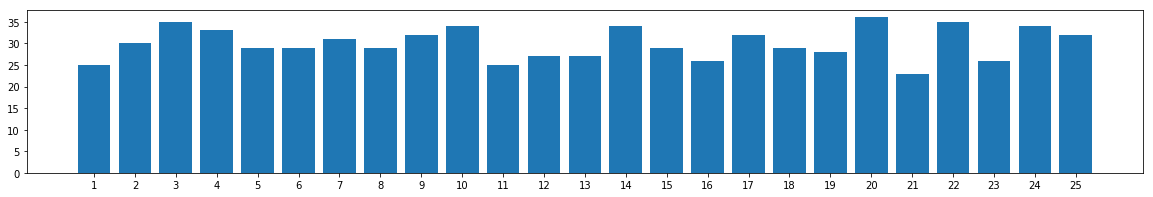

In [58]:
plt.figure(figsize=(20, 3))
plt.bar(frequencia_50_ultimos.keys(), frequencia_50_ultimos.values())
# plt.grid(True)
plt.xticks(range(1, len(frequencia_50_ultimos) + 1), frequencia_50_ultimos.keys())
plt.show()

In [67]:
concursos_10_ultimos = concursos[len(concursos) - 10:]
# imprimir_concursos(concursos_10_ultimos)

In [68]:
frequencia_10_ultimos = frequencia_concursos(concursos_10_ultimos)
print(frequencia_10_ultimos)

{1: 3, 2: 6, 3: 7, 4: 9, 5: 6, 6: 6, 7: 5, 8: 4, 9: 3, 10: 8, 11: 4, 12: 6, 13: 5, 14: 5, 15: 6, 16: 7, 17: 8, 18: 7, 19: 7, 20: 8, 21: 4, 22: 7, 23: 7, 24: 7, 25: 5}


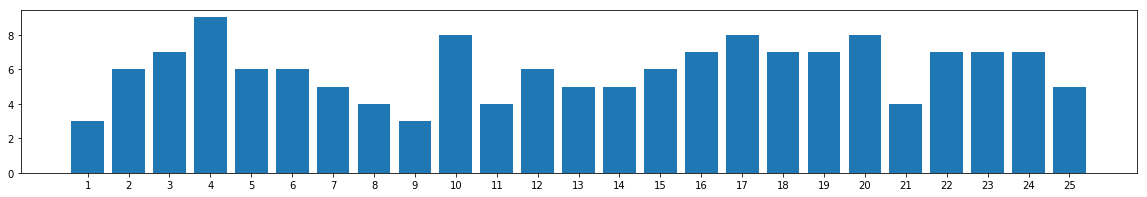

In [69]:
plt.figure(figsize=(20, 3))
plt.bar(frequencia_10_ultimos.keys(), frequencia_10_ultimos.values())
# plt.grid(True)
plt.xticks(range(1, len(frequencia_10_ultimos) + 1), frequencia_10_ultimos.keys())
plt.show()

In [70]:
atraso = atraso_concursos(concursos_50_ultimos)
print(atraso)

{1: 2, 2: 1, 3: 0, 4: 0, 5: 1, 6: 0, 7: 1, 8: 0, 9: 0, 10: 0, 11: 1, 12: 0, 13: 1, 14: 2, 15: 0, 16: 2, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 2, 23: 0, 24: 0, 25: 3}


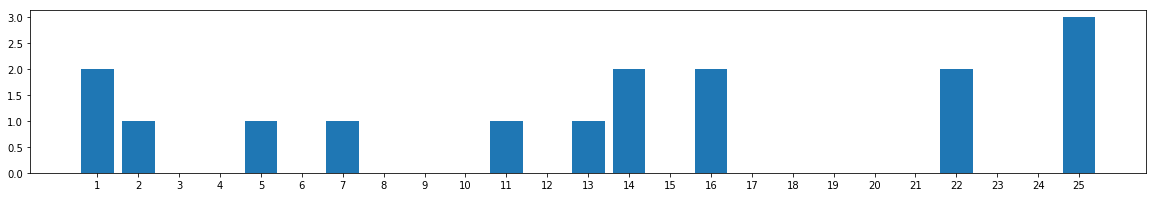

In [40]:
plt.figure(figsize=(20, 3))
plt.bar(atraso.keys(), atraso.values())
# plt.grid(True)
plt.xticks(range(1, len(atraso) + 1), atraso.keys())
plt.show()

In [76]:
def frequencia_impar_par(concursos):
    impar_par = []

    for c in concursos:
        if ([c.impar, c.par] not in impar_par):
            impar_par.append([c.impar, c.par])

    impar_par = sorted(impar_par)

    frequencia = [0] * len(impar_par)

    for c in concursos:
        for i in range(len(impar_par)):
            if (c.impar == impar_par[i][0] and c.par == impar_par[i][1]):
                frequencia[i] += 1
    
    impar_par_lst = []

    for i in impar_par:
        impar_par_lst.append(' - '.join([str(x) for x in i]))

    d = {k:v for k, v in zip(impar_par_lst, frequencia)}
    
    return d

In [77]:
freq_impar_par = frequencia_impar_par(concursos_50_ultimos)
print(freq_impar_par)

{'5 - 10': 2, '6 - 9': 8, '7 - 8': 17, '8 - 7': 11, '9 - 6': 11, '10 - 5': 1}


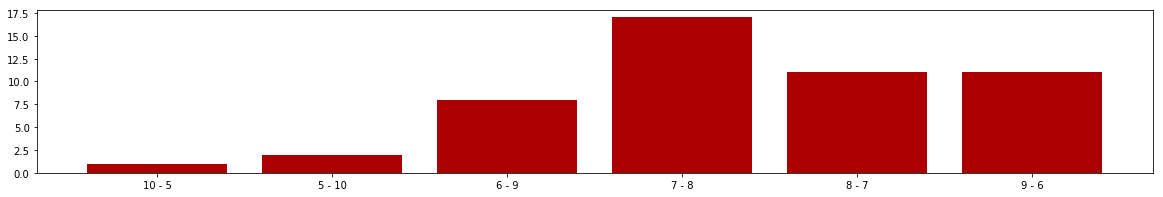

In [78]:
plt.figure(figsize=(20, 3))
plt.bar(freq_impar_par.keys(), freq_impar_par.values(), facecolor='#AA0000')
# plt.grid(True)
# plt.xticks(range(1, len(d) + 1), d.keys())
plt.show()

In [44]:
# f, ax = plt.subplots()

# index = np.arange(n_groups)
# bar_width = 0.35

ax = plt.bar(d.keys(), d.values(), color='coral', alpha= 0.8)

plt.xlabel('Impares - Pares')
plt.ylabel('Frequencia')
plt.title('Frequencia Impares - Pares', fontsize = 16)
# plt.xticks(len(d.keys()) + bar_width, d.keys())
# plt.legend()

for i in ax.patches:
    ax.text(i.get_x() - .03, i.get_height() + 0.5,
            str(round(100 * i.get_height() / sum(d.values()), 2)) + '%')

# plt.tight_layout()
plt.show()

AttributeError: 'BarContainer' object has no attribute 'text'

In [107]:
padrao_seq = []

for c in concursos_50_ultimos:
    if (c.sequencia not in padrao_seq):
        padrao_seq.append(c.sequencia)

In [108]:
padrao_seq

[(3, 2, 2, 2, 4),
 (5, 2, 2, 2),
 (2, 3, 2, 2, 4),
 (2, 7, 2),
 (4, 2, 2),
 (4, 3, 2, 4),
 (3, 2, 6),
 (2, 4, 3, 2, 3),
 (2, 2, 2, 2, 3),
 (6, 4, 2),
 (3, 3, 2, 2, 2),
 (2, 2, 2, 4, 2),
 (2, 6, 2),
 (3, 3, 2, 2),
 (4, 2, 3),
 (4, 3, 2, 2, 2),
 (2, 4, 5),
 (2, 2, 7),
 (2, 5, 3, 2),
 (3, 2, 5, 2),
 (2, 5),
 (4, 4, 2),
 (4, 4, 3, 2),
 (3, 3, 2, 4),
 (5, 2, 3, 2),
 (3, 3),
 (2, 4, 4, 3),
 (3, 2, 5, 3),
 (2, 3, 3, 2),
 (7, 2, 2),
 (2, 3, 4, 3),
 (3, 2, 4),
 (5, 2, 2),
 (8,),
 (4, 3, 3, 2),
 (2, 4, 2, 2),
 (5, 3),
 (3, 8),
 (4, 3, 5),
 (6, 2, 3),
 (4, 2),
 (4, 2, 3, 2),
 (3, 3, 3),
 (2, 3, 5)]

In [ ]:
imprimir_concursos(concursos[:20])

In [ ]:
d2 = dict.fromkeys(np.arange(1,16), 0)

for c in concursos:
    d2[max(c.sequencia)] += 1
    
d2

# Gerar jogos

In [ ]:
# jogos_nao_salvos = gerar_jogos(100000, menor_numero=(1,2,3,4), maior_numero=(23,24,25))
# len(jogos_nao_salvos)

In [ ]:
# a = 0

# while a < 20:
#     jogos_nao_salvos = gerar_jogos(10000, menor_numero=(1,2,3,4), maior_numero=(23,24,25))
#     salvar_jogos(jogos_nao_salvos)
#     a += 1


In [ ]:
# imprimir_jogo(jogos_nao_salvos)

In [ ]:
# start = time.time()
# salvar_jogos(jogos_nao_salvos)
# end = time.time()
# print((end - start)/60)

In [ ]:
# insert_jogo(jogos_nao_salvos[0])

# Jogos

In [ ]:
# start = time.time()
# jogos_salvos = get_all_jogos()
# end = time.time()

# print((end - start)/60)
# print(len(jogos_salvos))

In [109]:
jogos_filtrados = jogos

In [110]:
# for s in seq_inicial_unica:
#     jogos_filtrados = filtrar_jogo_sequencia(jogos_filtrados, s)

# len(jogos_filtrados)

In [111]:
# for s in seq_final_unica:
#     jogos_filtrados = filtrar_jogo_sequencia(jogos_filtrados, s)

# len(jogos_filtrados)

In [112]:
jogos_filtrados = filtrar_jogo_menor_maior(jogos_filtrados, (0,1), (25,26))
len(jogos_filtrados)

1144066

In [113]:
jogos_filtrados = filtrar_jogo_impar_par(jogos_filtrados, [7,8,9])
len(jogos_filtrados)

899514

In [116]:
jogos_filtrados = filtrar_jogo_por_numeros(jogos_filtrados, [14,16,22], 2)
len(jogos_filtrados)

559944

In [115]:
# jogos_filtrados = filtrar_jogo_notin(jogos_filtrados, [])

In [ ]:
# for c in jogos_filtrados:
#     sequencia = []
#     count = 0
    
#     for i in np.arange(1, len(c.numeros[1:])):
#         if c.numeros[i] == c.numeros[i - 1] + 1:
#             count += 1
#         else:
#             if count > 0:
#                 count += 1
#                 sequencia.append(count)
#                 count = 0
            
#     c.sequencia = sorted(tuple(sequencia)) 

In [117]:
jogos_t2 = []

for c in jogos_filtrados:
    if max(c.sequencia) <= 7 or c.sequencia == None:
        jogos_t2.append(c)

ValueError: max() arg is an empty sequence

In [ ]:
jogos_filtrados = jogos_t2
len(jogos_filtrados)

In [118]:
jogos_t3 = []
dezenas = np.arange(10,20)

for c in jogos_filtrados:
    if (len(set(c.numeros).intersection(dezenas)) >= 5 and len(set(c.numeros).intersection(dezenas)) <= 7):
        jogos_t3.append(c)

In [119]:
jogos_filtrados = jogos_t3
len(jogos_filtrados)

441889

In [120]:
jogos_t4 = []

for c in jogos_filtrados:
    if (len(c.sequencia) >= 3 and len(c.sequencia) <= 5):
        jogos_t4.append(c)
        
len(jogos_t4)

372291

In [121]:
jogos_filtrados = jogos_t4
len(jogos_filtrados)

372291

In [ ]:
# jogos_t6 = filtrar_jogo_por_numeros(jogos_t5, numeros=[19,20,21,22,23,24,25], match=7)
# len(jogos_t6)

In [ ]:
imprimir_jogo(jogos_filtrados[:100])

In [122]:
apostas_selecionadas = selecionar_jogos_aposta(jogos_filtrados, 130)

Percentual jogos com 1:  100.0
Percentual jogos com 2:  0.0
Percentual jogos com 3:  0.0
Percentual jogos impar 7:  26.923076923076923
Percentual jogos impar 8:  43.07692307692308
Percentual jogos impar 9:  30.0
Sequencia 0:  0.0
Sequencia 5:  0.0
Sequencia 6:  0.0
Sequencia 7:  0.0


In [123]:
imprimir_jogo(apostas_selecionadas)

Total jogos: 130 

ID:  None
Data Cadastro:  None
Numeros: 15 - Impares: 9 - Pares: 6 | Sequencia: (2, 6, 3)
(1, 4, 5, 7, 8, 9, 10, 11, 12, 14, 17, 21, 22, 23, 25)


ID:  None
Data Cadastro:  None
Numeros: 15 - Impares: 9 - Pares: 6 | Sequencia: (4, 2, 2, 2, 2)
(1, 3, 4, 5, 6, 9, 11, 12, 14, 15, 18, 19, 21, 22, 25)


ID:  None
Data Cadastro:  None
Numeros: 15 - Impares: 7 - Pares: 8 | Sequencia: (2, 3, 5)
(1, 2, 4, 7, 8, 9, 12, 13, 14, 15, 16, 19, 22, 24, 25)


ID:  None
Data Cadastro:  None
Numeros: 15 - Impares: 8 - Pares: 7 | Sequencia: (3, 2, 2)
(1, 5, 6, 7, 9, 11, 12, 14, 16, 17, 20, 22, 23, 24, 25)


ID:  None
Data Cadastro:  None
Numeros: 15 - Impares: 7 - Pares: 8 | Sequencia: (4, 2, 2, 2)
(1, 2, 3, 4, 11, 12, 14, 15, 17, 18, 20, 22, 23, 24, 25)


ID:  None
Data Cadastro:  None
Numeros: 15 - Impares: 9 - Pares: 6 | Sequencia: (3, 3, 2, 2)
(1, 2, 3, 7, 9, 10, 11, 13, 15, 16, 18, 20, 22, 23, 25)


ID:  None
Data Cadastro:  None
Numeros: 15 - Impares: 8 - Pares: 7 | Sequencia: (3,

In [165]:
seq_inicial = []
seq_final = []

for c in concursos_50_ultimos:
#     if (c.numeros[0] == 1):
    a = []

    for n in c.numeros:
        if n <= 5:
            a.append(n)

    seq_inicial.append(a)
        
#     if (c.numeros[-1] in (24,25)):
    b = []

    for o in c.numeros[10:15]:
        if o >= 20:
            b.append(o)

    seq_final.append(b)
        
seq_inicial_unica = []
seq_final_unica = []

i = 0

while i < len(seq_inicial):
    if (len(seq_inicial[i]) > 1):
        if (seq_inicial[i] not in seq_inicial_unica):
            seq_inicial_unica.append(seq_inicial[i])
        
    i += 1

    
j = 0

while j < len(seq_final):
    if (len(seq_final[j]) > 1):
        if (seq_final[j] not in seq_final_unica):
            seq_final_unica.append(seq_final[j])
        
    j += 1

In [166]:
print(sorted(seq_inicial_unica))
print(sorted(seq_final_unica))

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 5], [1, 2, 4], [1, 2, 4, 5], [1, 3], [1, 3, 4], [1, 3, 4, 5], [1, 3, 5], [2, 3], [2, 3, 4], [2, 3, 4, 5], [2, 4, 5], [2, 5], [3, 4], [3, 4, 5], [3, 5], [4, 5]]
[[20, 21, 22, 23, 25], [20, 21, 22, 24], [20, 21, 22, 24, 25], [20, 21, 22, 25], [20, 21, 23, 24], [20, 21, 23, 24, 25], [20, 21, 23, 25], [20, 21, 24], [20, 21, 24, 25], [20, 21, 25], [20, 22, 23], [20, 22, 23, 24], [20, 22, 23, 24, 25], [20, 22, 23, 25], [20, 22, 24], [20, 22, 24, 25], [20, 22, 25], [20, 23, 24], [20, 23, 24, 25], [20, 24], [20, 24, 25], [21, 22, 23, 24], [21, 22, 23, 24, 25], [21, 22, 24, 25], [21, 23], [21, 24, 25], [22, 23, 24], [22, 23, 25], [22, 24], [22, 24, 25]]


In [162]:
tst = []

for x in sorted(seq_inicial_unica):
    txt = ', '.join([str(y) for y in x])
    tst.append(txt)

print(tst)

['1, 2', '1, 2, 3', '1, 2, 3, 4', '1, 2, 3, 4, 5', '1, 2, 3, 5', '1, 2, 4', '1, 2, 4, 5', '1, 3', '1, 3, 4', '1, 3, 4, 5', '1, 3, 5']


In [163]:
d1 = dict([(k, 0) for k in tst])
print(d1)

{'1, 2': 0, '1, 2, 3': 0, '1, 2, 3, 4': 0, '1, 2, 3, 4, 5': 0, '1, 2, 3, 5': 0, '1, 2, 4': 0, '1, 2, 4, 5': 0, '1, 3': 0, '1, 3, 4': 0, '1, 3, 4, 5': 0, '1, 3, 5': 0}


In [164]:
i = 0

while i < len(apostas):
    j = 0
    while j < len(apostas):
        if i != j:
            if len(set(apostas[i].numeros).intersection(apostas[j].numeros)) == 15:
                del apostas[j]
        j += 1
#     print(len(set(a).intersection(apostas[i])))
    i += 1

NameError: name 'apostas' is not defined

In [ ]:
# !pip install urllib urllib2

In [ ]:
# import urllib

In [ ]:
# page = urllib.request.urlopen("file:///Users/raphael/Documents/GitHub/python_scripts/D_LOTFAC.HTM", 'r')

In [ ]:
# from bs4 import BeautifulSoup

In [ ]:
# soup = BeautifulSoup(page.read(), 'html.parser')

In [ ]:
# soup = BeautifulSoup(page.read(), 'lxml')

In [ ]:
# table = soup.find_all('table')[0]

In [ ]:
# for row in table.find_all('tr'):
#     columns = row.find_all(['td', 'th'])
#     for col in columns:
#         print(col.text())

In [ ]:
# i = 1
# for row in soup.findAll('table')[0].findAll('tr'):
#     concurso = row.findAll('td')
#     print(concurso)
    
#     i += 1

In [ ]:
par_impar_lst = []

for x in concursos:
    par_impar_lst.append([x.impar, x.par])
  
df_v2 = pd.DataFrame(par_impar_lst, columns=['impar', 'par'])
df_v2.set_index(['impar'])
# par_impar_dic = dict(par_impar_lst)
# print(par_impar_dic)

In [ ]:
df_v2_group = df_v2.groupby(['impar', 'par'])['impar'].count()

In [ ]:
df_v2_group

In [ ]:
df_v3 = pd.DataFrame(df_v2_group)

In [ ]:
df_v3['perc'] = [(x*100)/df_v2_group.values.sum() for x in df_v2_group.values]

In [ ]:
df_v3

In [143]:
menor = []
maior = []
menor_maior_list = []
menor_maior_dict = {}
menor_maior_strg = []

In [144]:
for x in concursos_10_ultimos:
    menor.append(x.numeros[0])
    maior.append(x.numeros[-1])
    menor_maior_list.append([x.numeros[0], x.numeros[-1]])
    menor_maior_strg.append(str(x.numeros[0]) + ' - ' + str(x.numeros[-1]))
#     menor_maior.update({str(x.numeros[0]) + ' - ' + str(x.numeros[-1]): 1})

In [145]:
import matplotlib.pyplot as plt

In [146]:
menor_freq = np.histogram(menor, bins=np.arange(1,11))

In [147]:
menor_perc = [(x * 100)/len(concursos_10_ultimos) for x in menor_freq[0]]

In [148]:
menor_perc

[30.0, 30.0, 20.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [149]:
np.histogram(maior, bins=np.arange(15,26))

(array([0, 0, 0, 0, 0, 0, 0, 0, 1, 9], dtype=int64),
 array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]))

In [150]:
menor_maior_list[:5]

[[4, 25], [4, 24], [3, 25], [1, 24], [2, 25]]

In [151]:
menor_maior_strg[:5]

['4 - 25', '4 - 24', '3 - 25', '1 - 24', '2 - 25']

In [152]:
df_menor_maior_list = pd.DataFrame(menor_maior_list, columns=['menor', 'maior'])

In [153]:
df_menor_maior_list.set_index(['menor', 'maior'])

Empty DataFrame
Columns: []
Index: [(4, 25), (4, 24), (3, 25), (1, 24), (2, 25), (2, 25), (1, 25), (1, 23), (2, 24), (3, 24)]

In [154]:
menor_maior_freq = df_menor_maior_list.groupby(['menor', 'maior']).count()

In [155]:
menor_maior_freq.values

array([], shape=(9, 0), dtype=float64)

In [156]:
menor_maior_perc = [(x*100)/len(concursos) for x in menor_maior_freq.values]

In [157]:
df = pd.DataFrame(menor_maior_freq)

In [158]:
df['percentual'] = menor_maior_perc

In [159]:
df

percentual
menor maior           
1     23            []
      24            []
      25            []
2     24            []
      25            []
3     24            []
      25            []
4     24            []
      25            []

In [ ]:
df_menor_maior_str = pd.DataFrame(menor_maior_strg, columns=['col'])

In [ ]:
menor_maior_group = df_menor_maior_str.groupby('col')['col'].count()

In [ ]:
df_v1 = pd.DataFrame(menor_maior_group)

In [ ]:
df_v1

In [ ]:
# plt.hist(df_v1)
# plt.show()

In [ ]:
# np.histogram(menor_maior)

In [ ]:
# plt.hist([menor, maior], bins=np.arange(1,26))
# plt.xlabel('Menor Numero Sorteado')
# plt.ylabel('Frequencia')
# plt.grid(True)
# plt.show()

In [ ]:
# gravar_jogo(apostas)

In [ ]:
# from __future__ import print_function
 
# import MySQLdb as my
 
# try:
 
#     db = my.connect(host="127.0.0.1",
#                     user="root",
#                     passwd="",
#                     db="world"
#                     )
 
#     cursor = db.cursor()
 
#     sql = "select * from city where id < 10"
#     number_of_rows = cursor.execute(sql)
 
#     print(cursor.fetchone())  # fetch the first row only
 
#     db.close()
 
# except my.DataError as e:
#     print("DataError")
#     print(e)
 
# except my.InternalError as e:
#     print("InternalError")
#     print(e)
 
# except my.IntegrityError as e:
#     print("IntegrityError")
#     print(e)
 
# except my.OperationalError as e:
#     print("OperationalError")
#     print(e)
 
# except my.NotSupportedError as e:
#     print("NotSupportedError")
#     print(e)
 
# except my.ProgrammingError as e:
#     print("ProgrammingError")
#     print(e)
 
# except :
#     print("Unknown error occurred")

In [ ]:
from reportlab.pdfgen import canvas
from reportlab.lib.units import cm
from reportlab.graphics.shapes import Rect
from reportlab.lib.colors import black

In [ ]:
c = canvas.Canvas("formulario.pdf", pagesize=(8.3*cm, 18.8*cm))
# c.drawString(100,750, "Bem vindo ao reportlab!")
# c.setFillColor()
# c.setPageTransition(cm)

# c.rect(1.1*cm, 13.6*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(2.4*cm, 13.6*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(3.7*cm, 13.6*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(5*cm, 13.6*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(6.3*cm, 13.6*cm, 0.5*cm, 0.3*cm, fill=1)

# c.rect(1.1*cm, 13.2*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(2.4*cm, 13.2*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(3.7*cm, 13.2*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(5*cm, 13.2*cm, 0.5*cm, 0.3*cm, fill=1)
# c.rect(6.3*cm, 13.2*cm, 0.5*cm, 0.3*cm, fill=1)

c.rect(1.1*cm, 8.55*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(2.4*cm, 8.55*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(3.7*cm, 8.55*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(5.0*cm, 8.55*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(6.3*cm, 8.55*cm, 0.5*cm, 0.3*cm, fill=1)

c.rect(1.1*cm, 8.1*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(2.4*cm, 8.1*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(3.7*cm, 8.1*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(5.0*cm, 8.1*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(6.3*cm, 8.1*cm, 0.5*cm, 0.3*cm, fill=1)

c.rect(1.1*cm, 7.65*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(2.4*cm, 7.65*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(3.7*cm, 7.65*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(5.0*cm, 7.65*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(6.3*cm, 7.65*cm, 0.5*cm, 0.3*cm, fill=1)

c.rect(1.1*cm, 7.2*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(2.4*cm, 7.2*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(3.7*cm, 7.2*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(5.0*cm, 7.2*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(6.3*cm, 7.2*cm, 0.5*cm, 0.3*cm, fill=1)

c.rect(1.1*cm, 6.75*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(2.4*cm, 6.75*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(3.7*cm, 6.75*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(5.0*cm, 6.75*cm, 0.5*cm, 0.3*cm, fill=1)
c.rect(6.3*cm, 6.75*cm, 0.5*cm, 0.3*cm, fill=1)

# c.rect(1,520,22,13, fill=1)
# c.rect(220,520,22,13, fill=1)
# c.rect(0,0,8.3*cm,18.8*cm, fill=0)
c.save()

# Conferencia

In [ ]:
def verificar_apostas(data_sorteio):
    try:
        concurso
        
    except Exception as ex:
        print(ex)
    

# Teste

In [ ]:
total = 0

for jogo in jogos_salvos:
    for c in concursos:
        if len(set(jogo.numeros).intersection(c.numeros)) == 15:
            print("Concurso: ", c.id)
            print("ID Aposta: ", jogo.id)
            print("Data Sorteio: ", c.data_sorteio)
#             print(jogo.numeros)
            print(c.numeros)
            print("\n")
            total += 1
            break
            
print('total jogos ganahdores: %s' % (total))

In [47]:
jogos = []
    
for a in np.arange(1, 26 - 14):
    if (a > 3):
        break
        
    for b in np.arange(a + 1, 26 - 13):
        for c in np.arange(b + 1, 26 - 12):
            for d in np.arange(c+1, 26 - 11):
                for e in np.arange(d+1, 26 - 10):
                    for f in np.arange(e+1, 26 - 9):
                        for g in np.arange(f+1, 26 - 8):
                            for h in np.arange(g+1, 26 - 7):
                                for i in np.arange(h+1, 26 - 6):
                                    for j in np.arange(i+1, 26 - 5):
                                        for k in np.arange(j+1, 26 - 4):
                                            for l in np.arange(k+1, 26 - 3):
                                                for m in np.arange(l+1, 26 - 2):
                                                    for n in np.arange(m+1, 26 - 1):
                                                        for o in np.arange(n+1, 26 - 0):
                                                            jogo = Jogo()
                                                            num = (a, b, c, d, e, f, g, h, i, j, k, l, m, n, o)
                                                            jogo.set_numeros(num)
                                                            jogos.append(jogo)

In [48]:
print(len(jogos))

3098216
